In [1]:
import sys
import os
from pathlib import Path

PROJ_NAME = "optimal-stopping"

# Locate the Project directory
curr_dir = str(Path.cwd())
start = curr_dir.find(PROJ_NAME)
if start < 0:
    print("ERROR: Project directory not found")
    print("Make sure you have the correct project structure")
    print("and run the simulation from within the project")
proj_pathname = curr_dir[:(start+len(PROJ_NAME))]

# Create path to the project directory
proj_path = Path(proj_pathname)

# Add the project folder to PATH
sys.path.append(proj_pathname)

In [14]:
import numpy as np
from scipy import stats
from bin.result_processing import loadFile

import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib import rc
plt.rc('font', size = 20)
from matplotlib.ticker import FuncFormatter
import numpy as np

from scipy.interpolate import make_interp_spline, BSpline

In [3]:
results_path = Path(proj_path/"results/raw_data")
files = os.listdir(results_path)

policies = ['policyE', 'policyN', 'policyC', 'policyA', 'policyR', 'policyOST', 'policyM']

In [4]:
data={}

for filename in files:
    if filename[:7]=='results':
        with open(results_path/filename,"rb") as f:
            dataset, result = loadFile(f)
            if data.get(result.sensor_name,None)==None:
                data[result.sensor_name] = {}
            comm = result.comm
            data[result.sensor_name][result.policyName] = comm

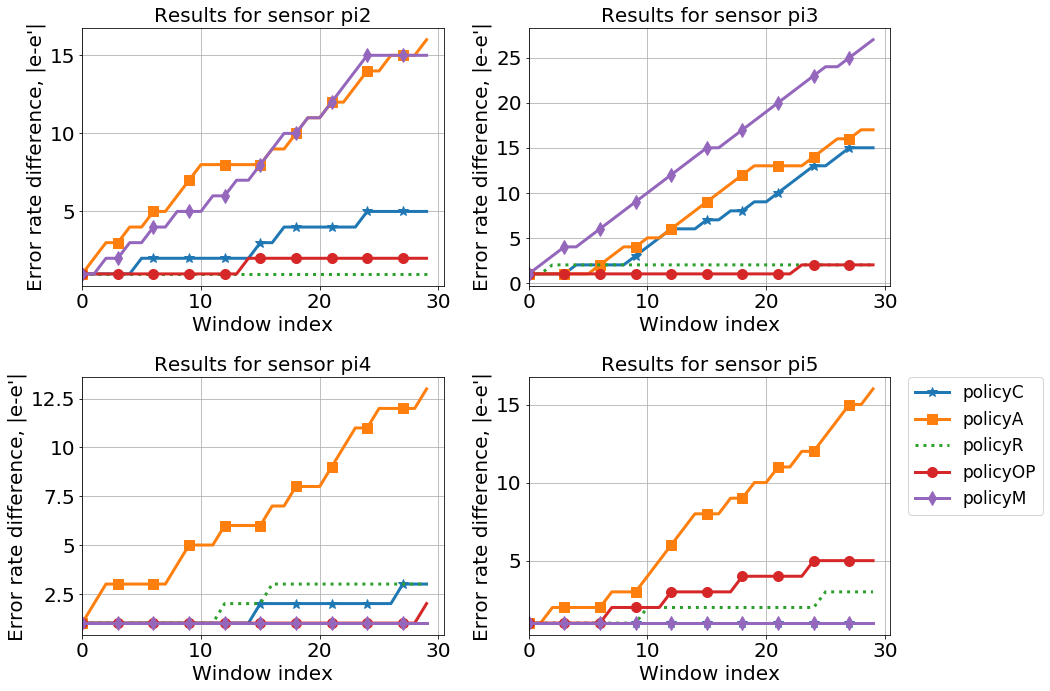

In [8]:
sensors = ["pi2","pi3","pi4","pi5"]
W = 25
linestyles = ['*-','s-',':', 'o-','d-']
pos = {"pi2":(0,0),"pi3":(0,1), "pi4":(1,0), "pi5":(1,1)}

fig, axs = plt.subplots(2,2, figsize=(15,10))
for S in sensors:
    i=0
    axs.item(pos[S]).grid(True)
    axs.item(pos[S]).tick_params(axis="y")
    axs.item(pos[S]).yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:g}".format(x)))
    for policy in policies:
        if policy != "policyE" and policy != "policyN":
            comm = data[S][policy][:30]
            x = np.arange(0,len(comm))
            if policy=="policyOST":
                axs.item(pos[S]).plot(x, comm, linestyles[i], fillstyle='full', label="policyOP", linewidth=3, markersize=10, markevery=3)
            else:
                axs.item(pos[S]).plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=3, markersize=10, markevery=3)
            i += 1

    axs.item(pos[S]).set_xlim(left=0)

    axs.item(pos[S]).set_xlabel("Window index")
    axs.item(pos[S]).set_ylabel("Error rate difference, |e-e'|")
    axs.item(pos[S]).title.set_text("Results for sensor "+S)
    axs.item(pos[S]).title.set_size(20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 17})
plt.tight_layout()
plt.show()

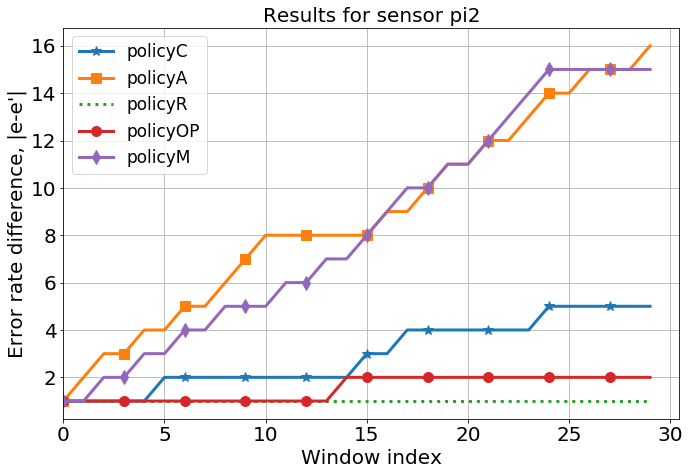

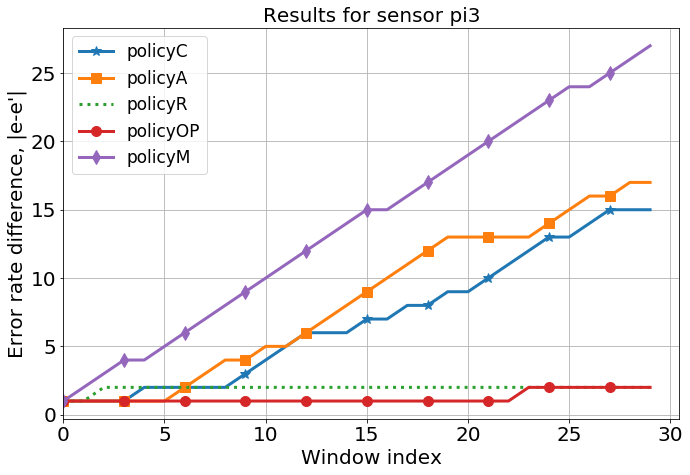

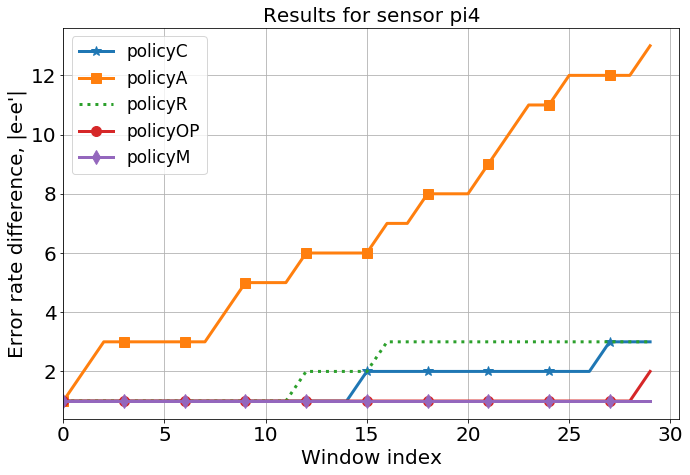

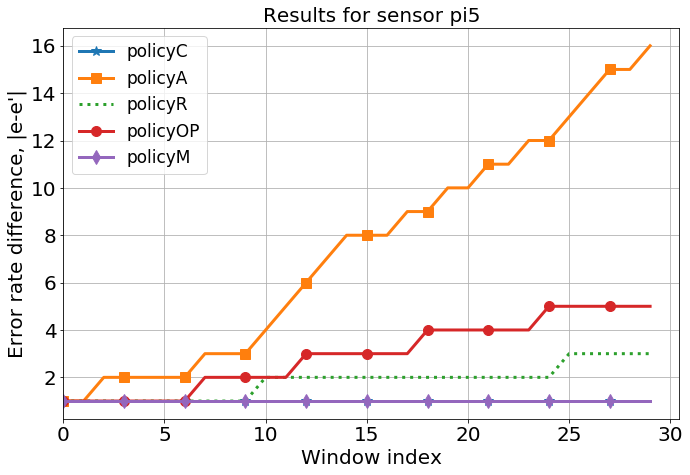

In [16]:
sensors = ["pi2","pi3","pi4","pi5"]
W = 25
linestyles = ['*-','s-',':', 'o-','d-']
pos = {"pi2":(0,0),"pi3":(0,1), "pi4":(1,0), "pi5":(1,1)}

for S in sensors:
    fig, ax = plt.subplots(figsize=(10,7))
    i=0
    ax.grid(True)
    ax.tick_params(axis="y")
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:g}".format(x)))
    for policy in policies:
        if policy != "policyE" and policy != "policyN":
            comm = data[S][policy][:30]
            x = np.arange(0,len(comm))
            if policy=="policyOST":
                ax.plot(x, comm, linestyles[i], fillstyle='full', label="policyOP", linewidth=3, markersize=10, markevery=3)
            else:
                ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=3, markersize=10, markevery=3)
            i += 1

    ax.set_xlim(left=0)

    ax.set_xlabel("Window index")
    ax.set_ylabel("Error rate difference, |e-e'|")
    ax.title.set_text("Results for sensor "+S)
    ax.title.set_size(20)

    plt.legend(loc='best',prop={'size': 17})
    plt.tight_layout()
    plt.show()

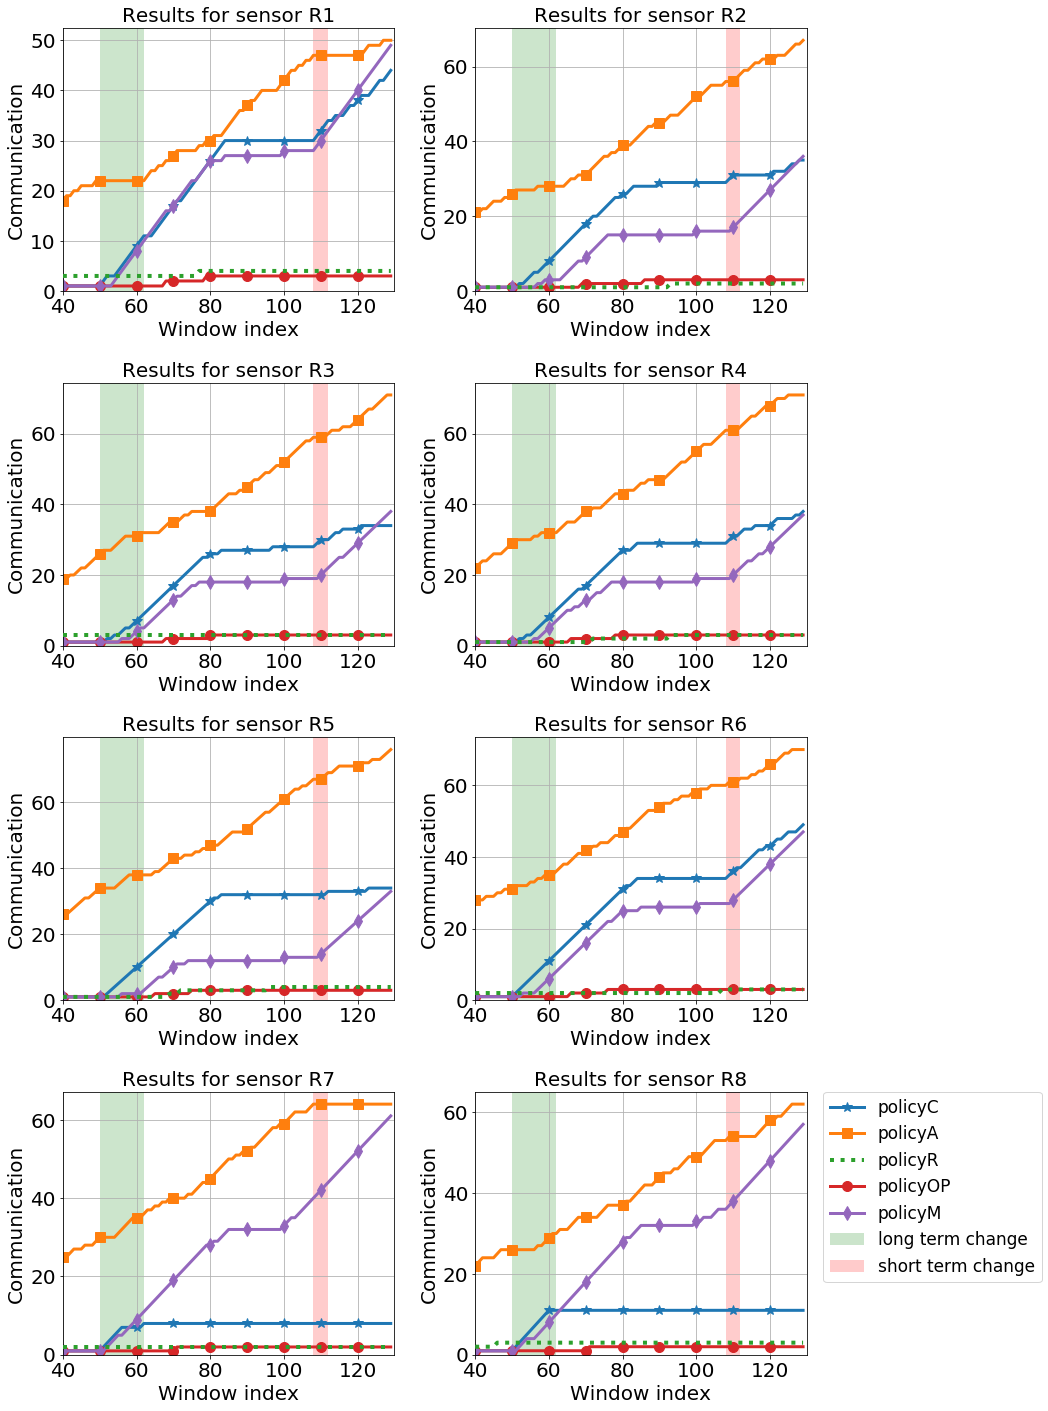

In [27]:
W = 25
sensors = ["R1","R2","R3","R4","R5", "R6","R7","R8"]
linestyles = ['*-','s-',':', 'o-','d-']
pos = {"R1":(0,0),"R2":(0,1),"R3":(1,0),"R4":(1,1),"R5":(2,0), "R6":(2,1),"R7":(3,0),"R8":(3,1)}

fig, axs = plt.subplots(4,2, figsize=(15,20))
for S in sensors:
    i=0
    
    axs.item(pos[S]).grid(True)

    axs.item(pos[S]).tick_params(axis="y")
    axs.item(pos[S]).yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:g}".format(x)))
    axs.item(pos[S]).axvspan(50, 62, facecolor='g', alpha=0.2, label="long term change")
    axs.item(pos[S]).axvspan(108, 112, facecolor='r', alpha=0.2, label="short term change")

    for policy in policies:
        if policy != "policyE" and policy != "policyN":
            comm = data[S][policy][40:130]
            x = np.arange(40,40+len(comm))
            if policy == "policyR":
                axs.item(pos[S]).plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=4, markersize=10, markevery=10, zorder=10)
            elif policy=="policyOST":
                axs.item(pos[S]).plot(x, comm, linestyles[i], fillstyle='full', label="policyOP", linewidth=3, markersize=10, markevery=10)
            else:
                axs.item(pos[S]).plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=3, markersize=10, markevery=10)
            i += 1

    axs.item(pos[S]).set_xlim(left=40)
    axs.item(pos[S]).set_ylim(bottom=0)
    axs.item(pos[S]).set_xlim(right=130)
    

    axs.item(pos[S]).set_xlabel("Window index")
    axs.item(pos[S]).set_ylabel("Communication")
    axs.item(pos[S]).title.set_text("Results for sensor "+S)
    axs.item(pos[S]).title.set_size(20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 17})
plt.tight_layout()
plt.show()

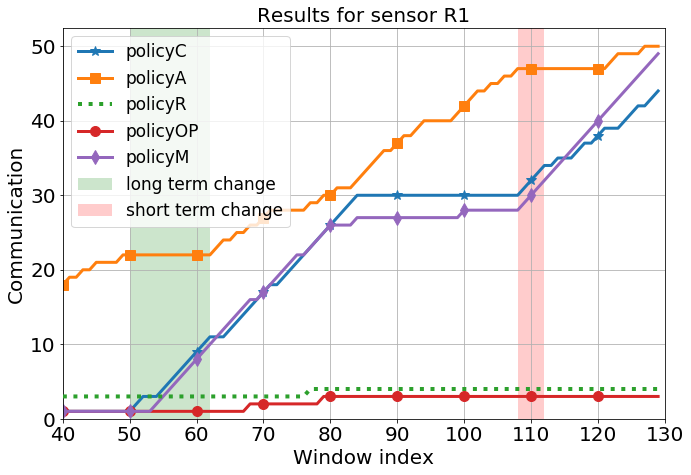

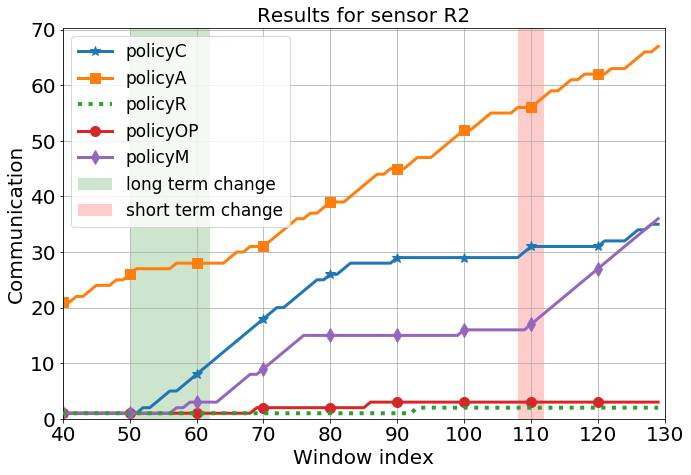

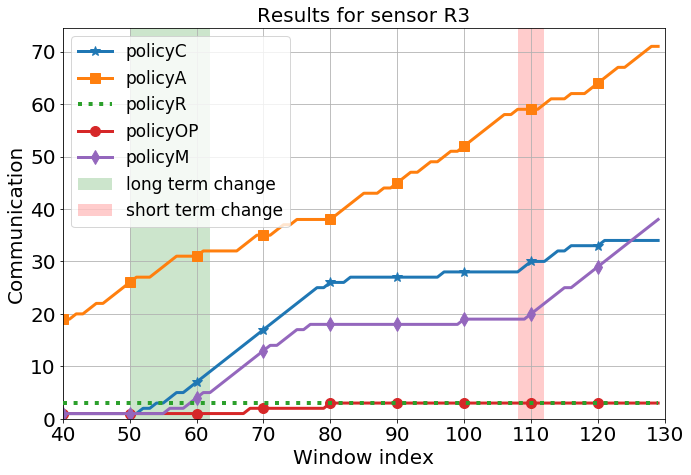

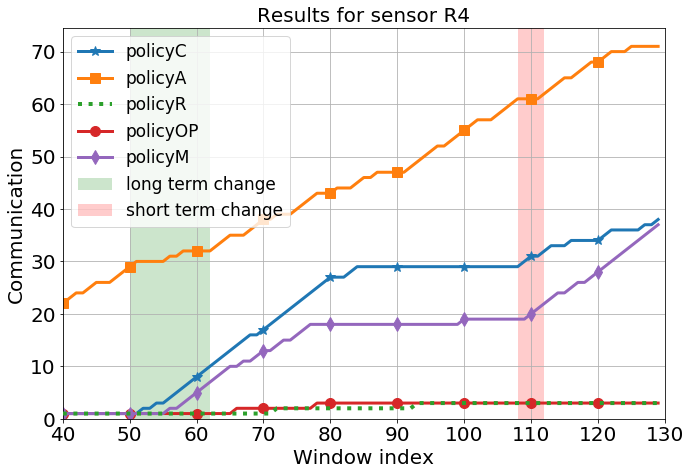

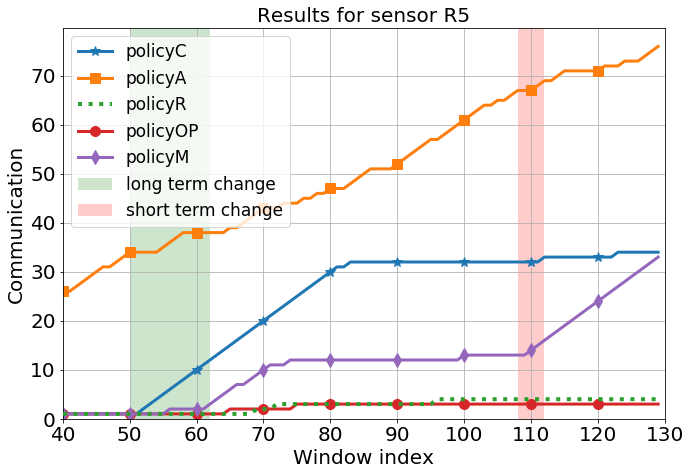

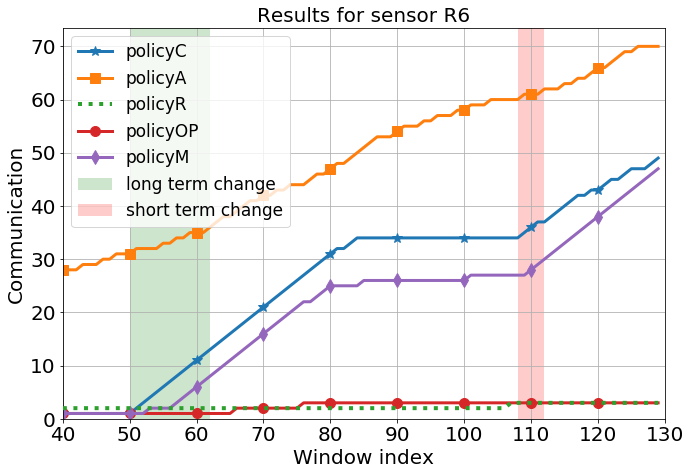

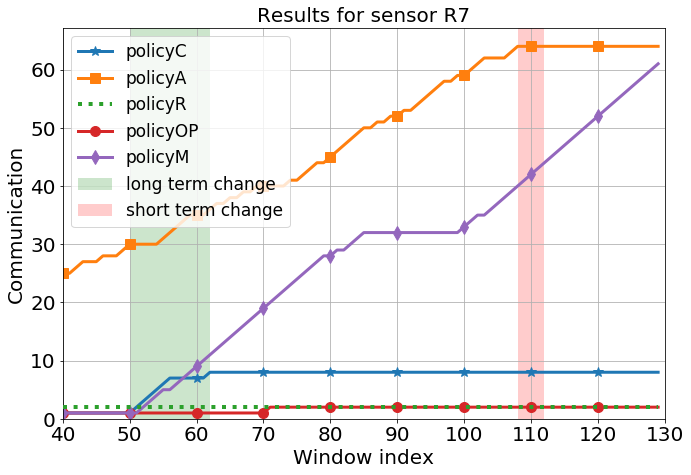

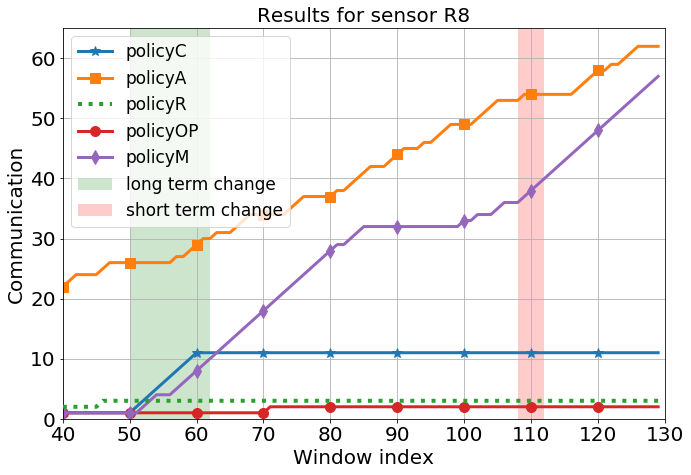

In [15]:
W = 25
sensors = ["R1","R2","R3","R4","R5", "R6","R7","R8"]
linestyles = ['*-','s-',':', 'o-','d-']
pos = {"R1":(0,0),"R2":(0,1),"R3":(1,0),"R4":(1,1),"R5":(2,0), "R6":(2,1),"R7":(3,0),"R8":(3,1)}

for S in sensors:
    fig, ax = plt.subplots(figsize=(10,7))
    i=0
    
    ax.grid(True)

    ax.tick_params(axis="y")
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:g}".format(x)))
    ax.axvspan(50, 62, facecolor='g', alpha=0.2, label="long term change")
    ax.axvspan(108, 112, facecolor='r', alpha=0.2, label="short term change")

    for policy in policies:
        if policy != "policyE" and policy != "policyN":
            comm = data[S][policy][40:130]
            x = np.arange(40,40+len(comm))
            if policy == "policyR":
                ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=4, markersize=10, markevery=10, zorder=10)
            elif policy=="policyOST":
                ax.plot(x, comm, linestyles[i], fillstyle='full', label="policyOP", linewidth=3, markersize=10, markevery=10)
            else:
                ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=3, markersize=10, markevery=10)
            i += 1

    ax.set_xlim(left=40)
    ax.set_ylim(bottom=0)
    ax.set_xlim(right=130)
    

    ax.set_xlabel("Window index")
    ax.set_ylabel("Communication")
    ax.title.set_text("Results for sensor "+S)
    ax.title.set_size(20)

    plt.legend(loc='best',prop={'size': 17})
    plt.tight_layout()
    plt.show()